<a href="https://colab.research.google.com/github/ariqnfl/ds_project/blob/main/Asean_Covid_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import numpy as np
import pandas as pd
import requests

In [2]:
def get_json(api_url):
	response = requests.get(api_url)
	if response.status_code == 200:
		return json.loads(response.content.decode('utf-8'))
	else:
		return None

In [3]:
record_date = '2021-01-05'
covid_url = 'https://covid19-api.org/api/status?date='+record_date
df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))

print(df_covid_worldwide.head())

  country          last_update     cases  deaths  recovered
0      US  2021-01-04T23:22:27  20782635  353069          0
1      IN  2021-01-04T23:22:27  10340469  149649    9946867
2      BR  2021-01-04T23:22:27   7753752  196561    6950045
3      RU  2021-01-04T23:22:27   3226758   58203    2612934
4      GB  2021-01-04T23:22:27   2721590   75544       6145


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
df_covid_worldwide['last_update'] = pd.to_datetime(df_covid_worldwide['last_update'], format='%Y-%m-%d %H:%M:%S')
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x: x.date())

In [9]:
df_covid_worldwide.head()

,country,last_update,cases,deaths,recovered
0,US,2021-01-04,20782635,353069,0
1,IN,2021-01-04,10340469,149649,9946867
2,BR,2021-01-04,7753752,196561,6950045
3,RU,2021-01-04,3226758,58203,2612934
4,GB,2021-01-04,2721590,75544,6145


In [13]:
countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.io.json.json_normalize(get_json(countries_url))
df_countries = df_countries.rename(columns={'alpha2': 'country'})[['name','country']]

df_countries.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,country
0,Afghanistan,AF
1,Albania,AL
2,Algeria,DZ
3,Andorra,AD
4,Angola,AO


In [14]:
df_covid_denormalized = pd.merge(df_covid_worldwide, df_countries, on='country')

df_covid_denormalized.head()

,country,last_update,cases,deaths,recovered,name
0,US,2021-01-04,20782635,353069,0,United States of America
1,IN,2021-01-04,10340469,149649,9946867,India
2,BR,2021-01-04,7753752,196561,6950045,Brazil
3,RU,2021-01-04,3226758,58203,2612934,Russian Federation
4,GB,2021-01-04,2721590,75544,6145,United Kingdom of Great Britain and Northern I...


In [15]:
df_covid_denormalized['fatality_ratio'] = df_covid_denormalized.deaths / df_covid_denormalized.cases

In [16]:
df_covid_denormalized.head()

,country,last_update,cases,deaths,recovered,name,fatality_ratio
0,US,2021-01-04,20782635,353069,0,United States of America,0.016989
1,IN,2021-01-04,10340469,149649,9946867,India,0.014472
2,BR,2021-01-04,7753752,196561,6950045,Brazil,0.025350
3,RU,2021-01-04,3226758,58203,2612934,Russian Federation,0.018038
4,GB,2021-01-04,2721590,75544,6145,United Kingdom of Great Britain and Northern I...,0.027757


In [17]:
df_top_20_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio', ascending=False).head(20)

In [18]:
import matplotlib.pyplot as plt

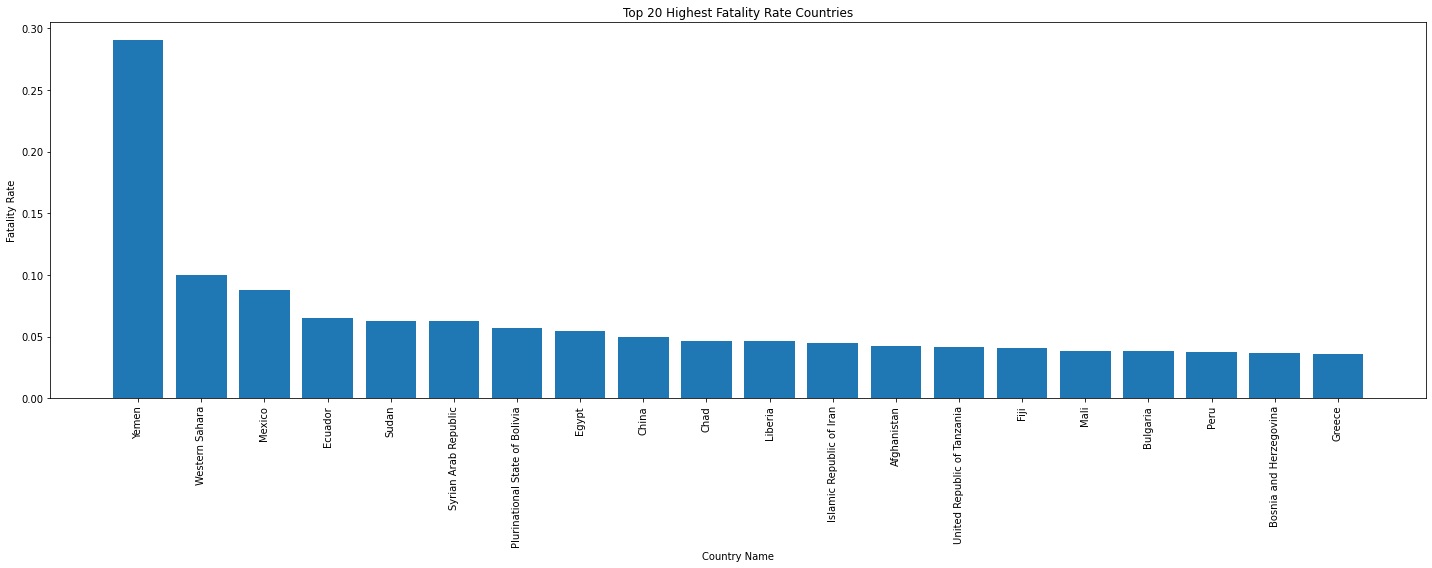

In [30]:
plt.figure(figsize=(20, 8))
x = df_top_20_fatality_rate['name']
y = df_top_20_fatality_rate['fatality_ratio']
plt.bar(x,y)
plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 20 Highest Fatality Rate Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [32]:
countries = ['ID','MY','SG','TH','VN']
i = 0
for country in countries:
	covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
	df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))
	df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%d %H:%M:%S')
	df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
	if i==0:
		df_covid_timeline_merged = df_covid_timeline
	else:
		df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
	i=i+1
    
df_covid_timeline_merged.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,country,last_update,cases,deaths,recovered
0,VN,2021-01-05,1497,35,1339
1,VN,2021-01-04,1497,35,1339
2,VN,2021-01-03,1494,35,1339
3,VN,2021-01-02,1482,35,1337
4,VN,2021-01-01,1474,35,1325


In [33]:
df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged, df_countries, on='country')

In [35]:
import datetime
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] >= datetime.date(2020, 3, 1))]

<Figure size 432x288 with 0 Axes>

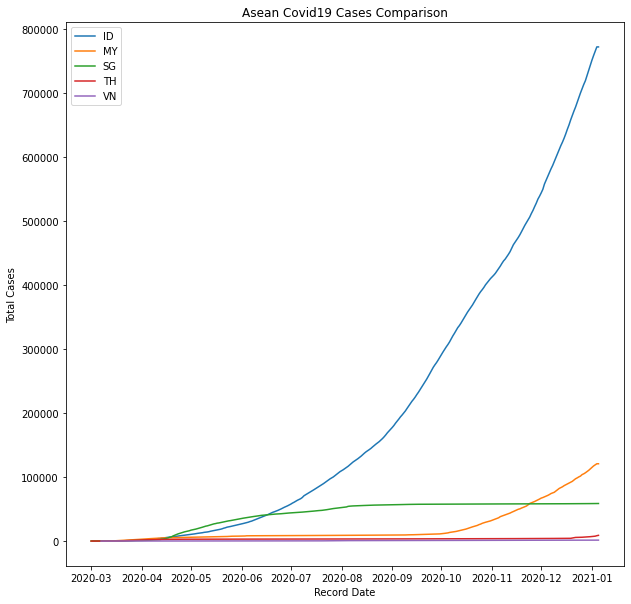

In [39]:
import matplotlib.pyplot as plt
plt.clf()
plt.figure(figsize=(10,10))
countries = ['ID','MY','SG','TH','VN']
for country in countries:
	country_data = df_covid_timeline_denormalized['country']==country
	x = df_covid_timeline_denormalized[country_data]['last_update']
	y = df_covid_timeline_denormalized[country_data]['cases']
	plt.plot(x, y, label = country)

plt.legend()
plt.xlabel('Record Date')
plt.ylabel('Total Cases')
plt.title('Asean Covid19 Cases Comparison')
plt.show()

<Figure size 432x288 with 0 Axes>

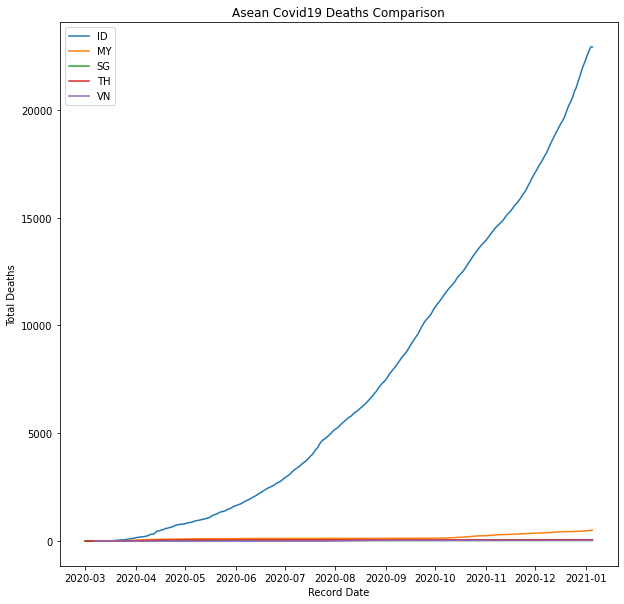

In [40]:
plt.clf()
plt.figure(figsize=(10,10))
countries = ['ID','MY','SG','TH','VN']
for country in countries:
	country_data = df_covid_timeline_denormalized['country']==country
	x = df_covid_timeline_denormalized[country_data]['last_update']
	y = df_covid_timeline_denormalized[country_data]['deaths']
	plt.plot(x, y, label = country)

plt.legend()
plt.xlabel('Record Date')
plt.ylabel('Total Deaths')
plt.title('Asean Covid19 Deaths Comparison')
plt.show()

<Figure size 432x288 with 0 Axes>

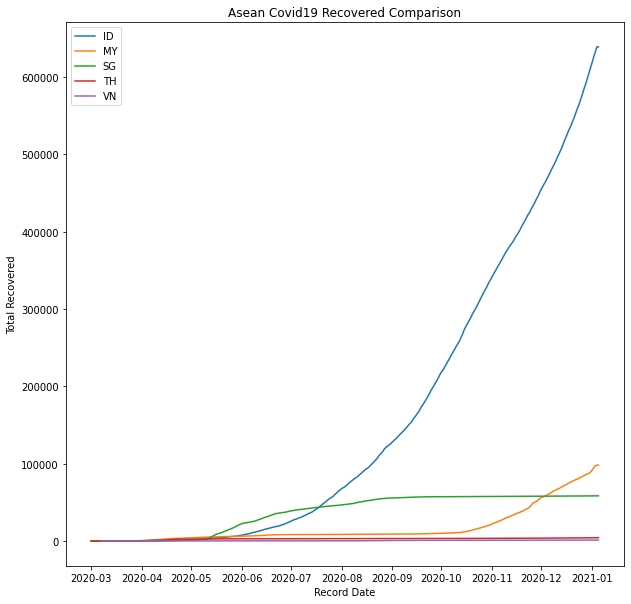

In [41]:
plt.clf()
plt.figure(figsize=(10,10))
countries = ['ID','MY','SG','TH','VN']
for country in countries:
	country_data = df_covid_timeline_denormalized['country']==country
	x = df_covid_timeline_denormalized[country_data]['last_update']
	y = df_covid_timeline_denormalized[country_data]['recovered']
	plt.plot(x, y, label = country)

plt.legend()
plt.xlabel('Record Date')
plt.ylabel('Total Recovered')
plt.title('Asean Covid19 Recovered Comparison')
plt.show()